In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

Let's read in our clean dataset from the previous lesson.

In [2]:
df = pd.read_csv('stores.csv', index_col=0)
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,sale_total,day_of_week,month
sale_date,,,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,10.92,Tuesday,January
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX,218.40,Tuesday,January
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,San Antonio,TX,125.55,Tuesday,January
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,San Antonio,TX,453.60,Tuesday,January
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,San Antonio,TX,294.00,Tuesday,January


As some of you have noticed, datetime objects will be read in as strings from csv files. Let's set our index as the proper datetime datatype.

In [3]:
df.index = pd.to_datetime(df.index)
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,sale_total,day_of_week,month
sale_date,,,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,10.92,Tuesday,January
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX,218.40,Tuesday,January
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,San Antonio,TX,125.55,Tuesday,January
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,San Antonio,TX,453.60,Tuesday,January
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,San Antonio,TX,294.00,Tuesday,January


Let's decide how to split our data into train/validate/test subsets before we begin exploration.

In [4]:
df.index.max(), df.index.min()

(Timestamp('2017-12-31 00:00:00'), Timestamp('2013-01-01 00:00:00'))

In [5]:
train  = df.loc[:'2015']
val = df.loc['2016']
test = df.loc['2017']
train.shape, val.shape, test.shape

((547500, 11), (183000, 11), (182500, 11))

In [6]:
df.shape

(913000, 11)

Let's do some exploration without time!

### Does store location affect total sales

In [7]:
train.store_address.nunique()

10

In [8]:
store_sums = train.groupby('store_address').sale_amount.sum().sort_values()
store_sums

store_address
12018 Perrin Beitel Rd     1852468
1520 Austin Hwy            2024724
1015 S WW White Rd         2025504
12125 Alamo Ranch Pkwy     2406336
516 S Flores St            2796994
735 SW Military Dr         2803588
8503 NW Military Hwy       2991622
2118 Fredericksburg Rdj    3030559
15000 San Pedro Ave        3267598
9255 FM 471 West           3414219
Name: sale_amount, dtype: int64

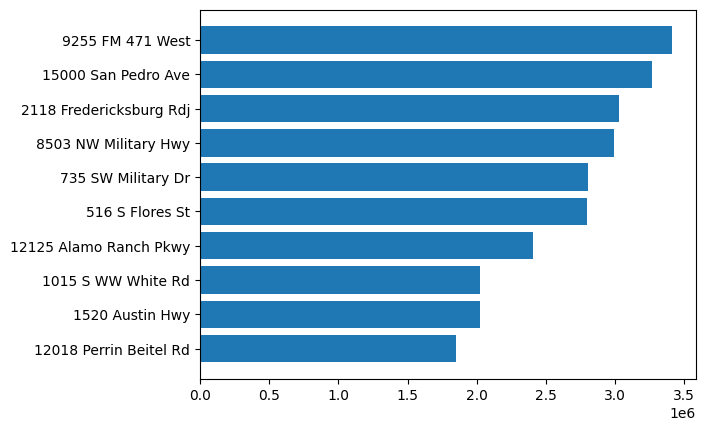

In [9]:
plt.barh(width=store_sums, y=store_sums.index)
plt.show()

### Yes, store location does affect total sales! Our top performing sotre is at 9255 FM 471 West. 

### Do we have more total sales on certain days of the week?

In [17]:
day_sums = train.groupby('day_of_week').sale_total.sum().sort_values()

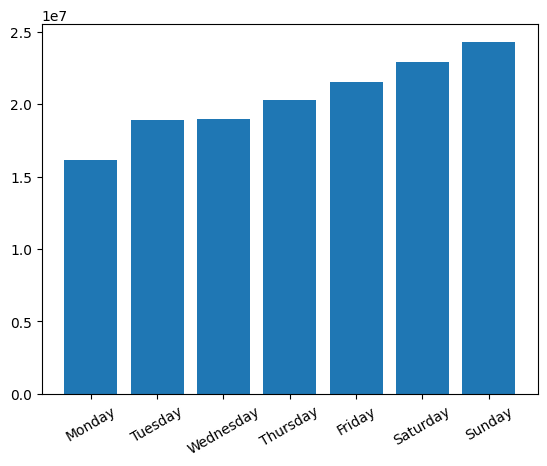

In [18]:
plt.bar(x=day_sums.index, height=day_sums)
plt.xticks(rotation=30)
plt.show()

Yes, day of week affects total sales! Friday, Saturday, and Sunday have the most total sales! Monday is the worst performer.

In [26]:
day_sample = train.resample('D').sale_total.sum()
day_sample.head()

sale_date
2013-01-01    73844.01
2013-01-02    73570.58
2013-01-03    78169.48
2013-01-04    84467.73
2013-01-05    87621.85
Freq: D, Name: sale_total, dtype: float64

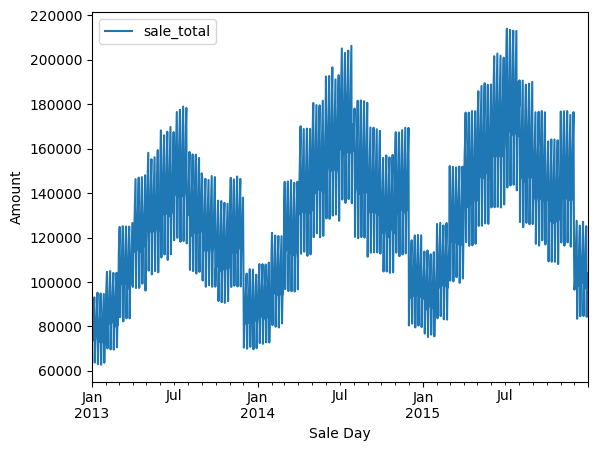

In [44]:
day_sample.plot()
plt.xlabel('Sale Day')
plt.ylabel('Amount')
plt.legend()
plt.show()

In [37]:
month_sample = train.resample('M').sale_total.sum()
month_sample.head()

sale_date
2013-01-31    2447368.20
2013-02-28    2469765.97
2013-03-31    3319815.58
2013-04-30    3666901.23
2013-05-31    4102278.40
Freq: M, Name: sale_total, dtype: float64

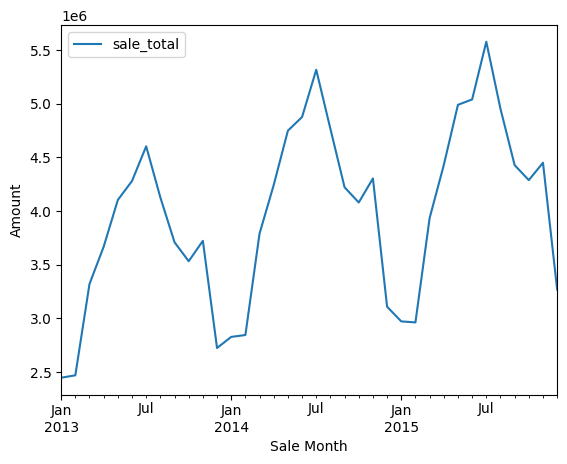

In [42]:
month_sample.plot()
plt.xlabel('Sale Month')
plt.ylabel('Amount')
plt.legend()
plt.show()

In [52]:
month_shift = pd.DataFrame({'now': day_sample, 
                           'one_month_out': day_sample.shift(-30)})

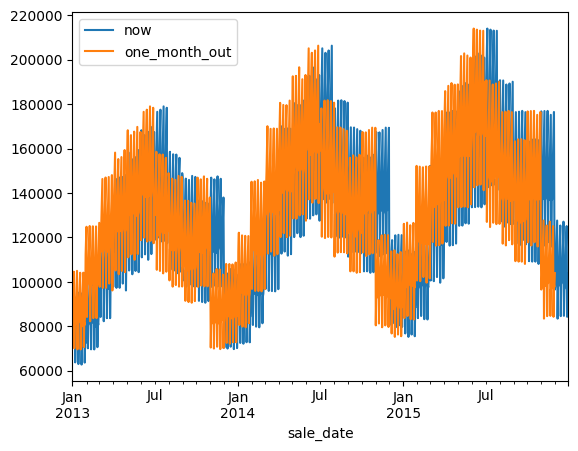

In [66]:
month_shift.plot()
plt.show()

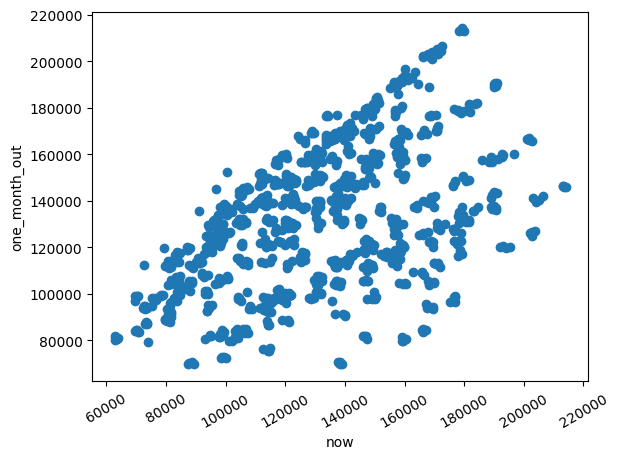

In [61]:
plt.scatter(x=month_shift.now, y=month_shift.one_month_out)
plt.xlabel('now')
plt.xticks(rotation=30)
plt.ylabel('one_month_out')
plt.show()

In [74]:
half_shift = pd.DataFrame({'now': day_sample, 
                           'half_year_out': day_sample.shift(-182)})

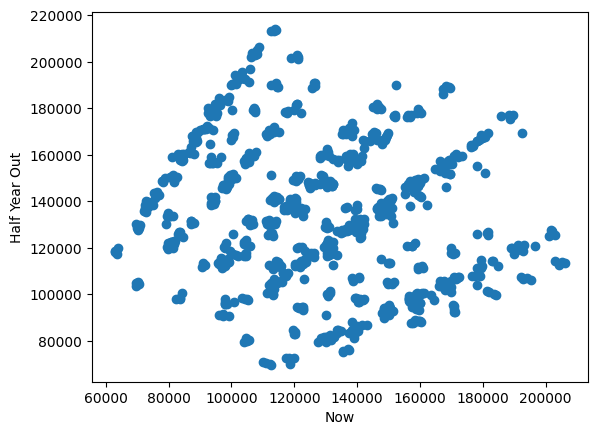

In [76]:
plt.scatter(x=half_shift.now, y=half_shift.half_year_out)
plt.xlabel('Now')
plt.ylabel('Half Year Out')
plt.show()

In [80]:
week_sample = train.resample('W').sale_total.sum()

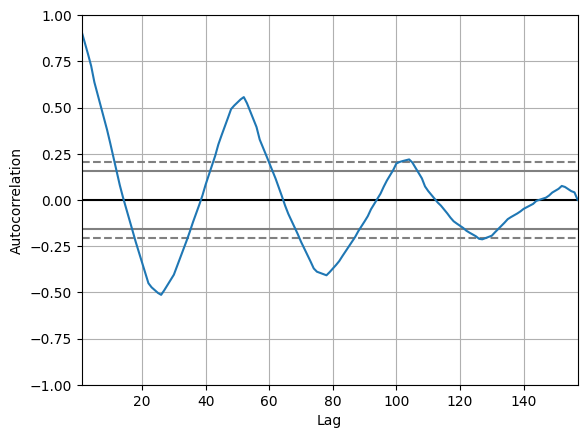

In [81]:
pd.plotting.autocorrelation_plot(weeke_sample)
plt.show()

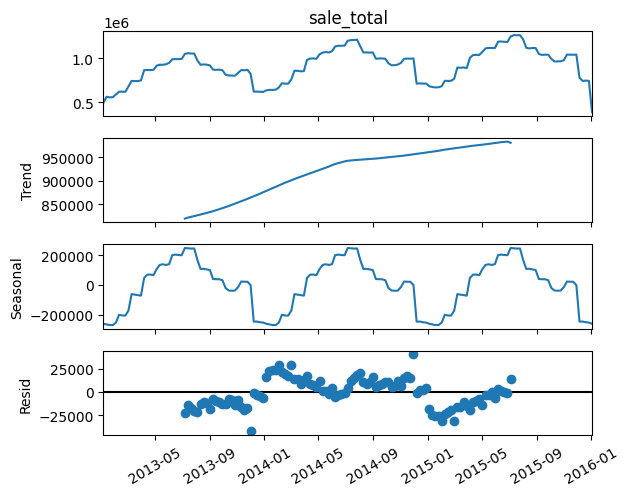

In [87]:
result = sm.tsa.seasonal_decompose(week_sample)
result.plot()
plt.xticks(rotation=30)
plt.show()